# Parag Dudeja
MCA 2, DUCS

## Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from sklearn.metrics import accuracies
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Loading the Dataset -  Heart Disease (UCI)

In [2]:
heart_disease_dataset = 'https://raw.githubusercontent.com/paragdudeja/Heart-Disease/main/heart.csv'
df = pd.read_csv(heart_disease_dataset)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Visualization

In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

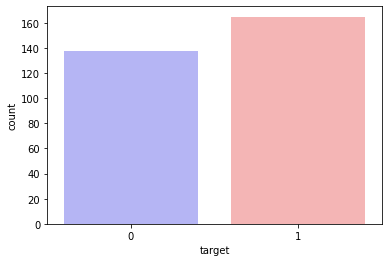

In [5]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

Target variable is our dependent variable, indicating whether the participant has heart disease (1) or not (0). Sample size of both group almost equal to each other.

In [6]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


Number of female participants: 96
Number of male participants: 207


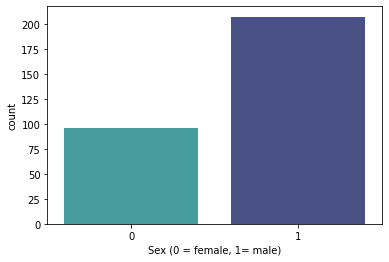

In [7]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
print("Number of female participants:" , df["sex"][df["sex"]==0].count())
print("Number of male participants:" , df["sex"][df["sex"]==1].count())
plt.show()

In the data set there are more men than in women.

Non-Diabetic participants: 258
Diabetic participants: 45


Text(0.5, 1.0, 'Diabetes')

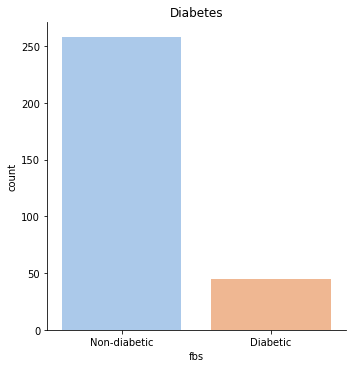

In [8]:
sns.catplot(x= "fbs", kind= "count", data=df, palette= "pastel").set_xticklabels(["Non-diabetic", "Diabetic"])

print("Non-Diabetic participants:" , df["fbs"][df["fbs"]==0].count())
print("Diabetic participants:" , df["fbs"][df["fbs"]==1].count())
plt.title('Diabetes')

In the data set, there are more participants who are non-diabetic (258) than diabetic (45).

In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


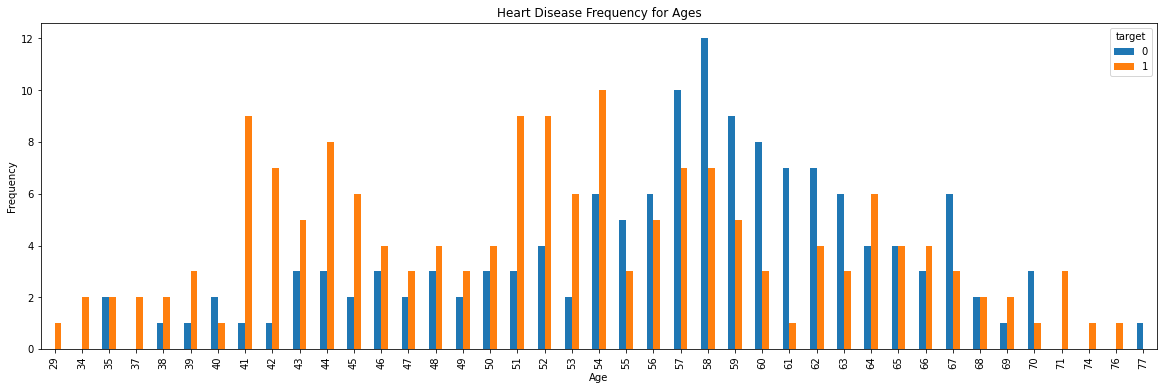

In [10]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

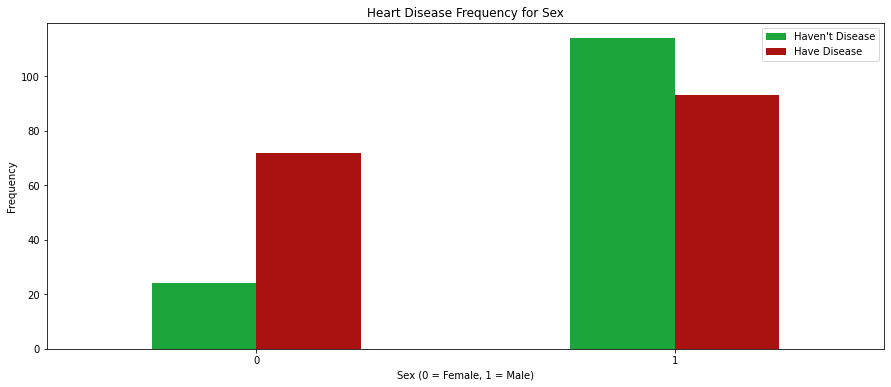

In [11]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [12]:
df_sex_target= df.groupby(["sex", "target"]).size()
df_sex_target

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

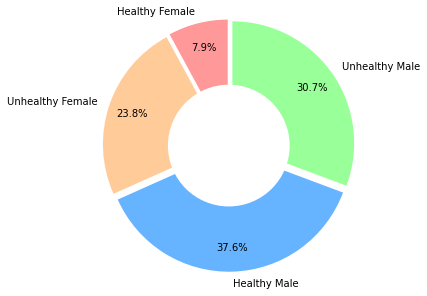

In [13]:
colors = ['#ff9999',"#ffcc99",'#66b3ff','#99ff99']
labels = 'Healthy Female','Unhealthy Female', "Healthy Male", 'Unhealthy Male'
explode = (0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots()
ax1.pie(df_sex_target.values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.8, radius=1.4, explode= explode)
cc= plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(cc)

In women, percentage of unhealthy females are significantly higher and in males percentage is almost the same but there are more healthy males than unhealthy. In general there are more men in the dataset then in women.

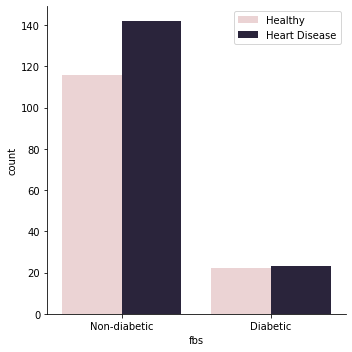

In [14]:
sns.catplot(x="fbs", kind="count",hue="target",data=df, palette="ch:s=-.1,r=.4", legend= False).set_xticklabels(["Non-diabetic", "Diabetic"])
plt.legend(loc= 'upper right', labels= ["Healthy","Heart Disease"])

There is no significant difference between non-diabetic and diabetic patients for heart disease but we see slightly more heart disease in the group with no diabetes.

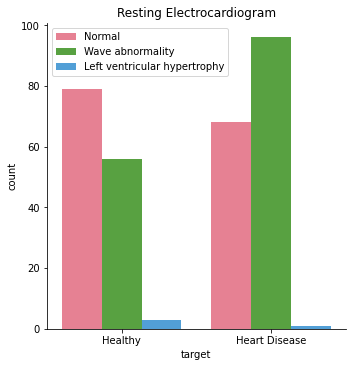

In [15]:
sns.catplot(x="target", kind="count",hue="restecg",data=df, palette="husl", legend= False).set_xticklabels(["Healthy", "Heart Disease"])
plt.title('Resting Electrocardiogram')
plt.legend(loc= "upper left", labels= ["Normal", "Wave abnormality", "Left ventricular hypertrophy"] )

Wave abnormality is higher on the diseased group, wave abnormality may be related to mild to severe heart problems.

Text(0.5, 1.0, 'Exercise Induced Angina')

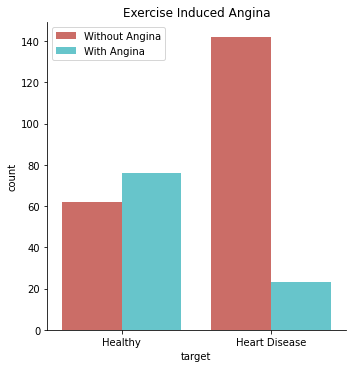

In [16]:
sns.catplot(x="target", kind="count",hue="exang",data=df, palette="hls", legend= False).set_xticklabels(["Healthy", "Heart Disease"])
plt.legend(loc= "upper left", labels= ["Without Angina", "With Angina"] )
plt.title('Exercise Induced Angina')

Exercise induced angina may be negatively related to heart disease, most people in the heart diseased group do not experience exercise induced angina.

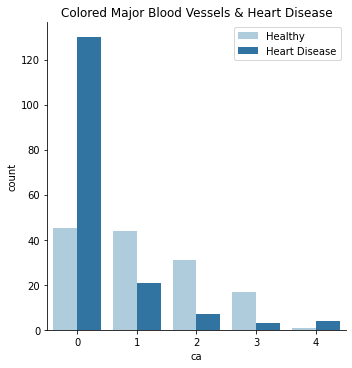

In [17]:
sns.catplot(x="ca", kind="count",hue="target",data=df, palette="Paired", legend= False)
plt.title('Colored Major Blood Vessels & Heart Disease')
plt.legend(loc= "upper right", labels= ["Healthy", "Heart Disease"] )

Higher the number better the blood flow, in the diseased group there may be less blood flow. Value 4 presents missing data therefore it is meaningless

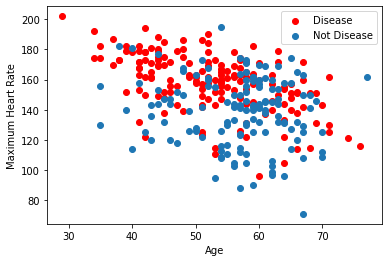

In [18]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

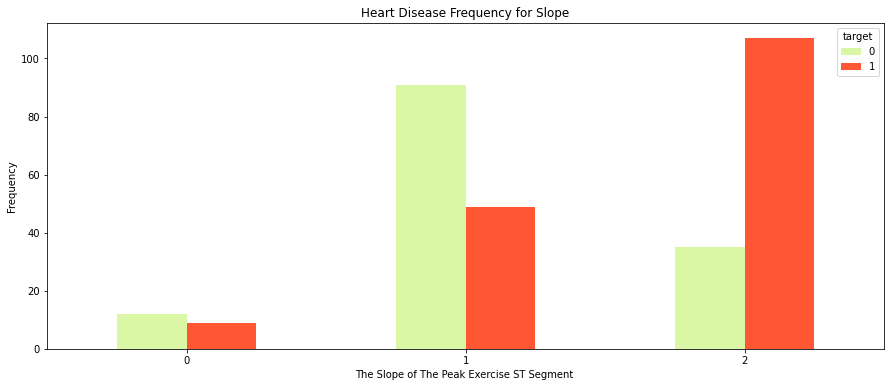

In [19]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

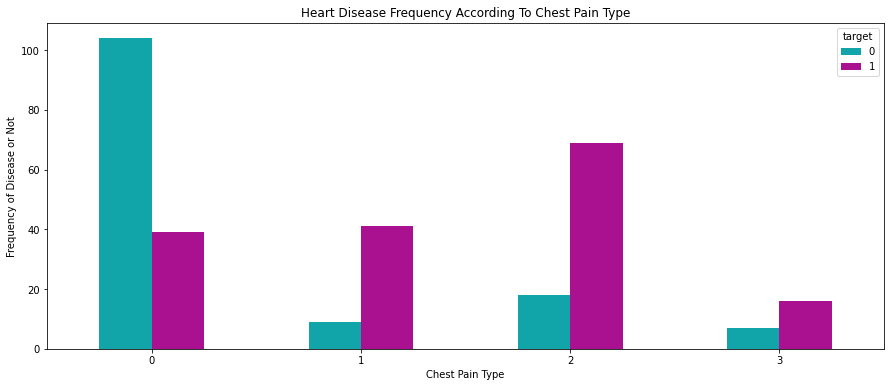

In [20]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

## Data Prepocessing

In [21]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [22]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [23]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


In [24]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

### Normalize

In [25]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

### Splitting datset for train and test

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

## Decision Tree

In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

accuracies = {}

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 77.05%


## KNN

In [28]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 77.05%


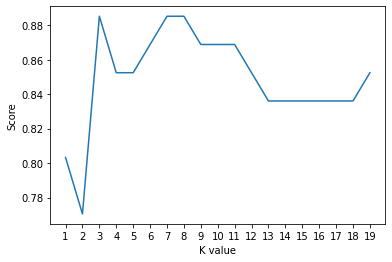

Maximum KNN Score is 88.52%


In [29]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

As we can see maximum accuracy is achieved with k as 3, 7 or 8

## Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


## Comparing Models

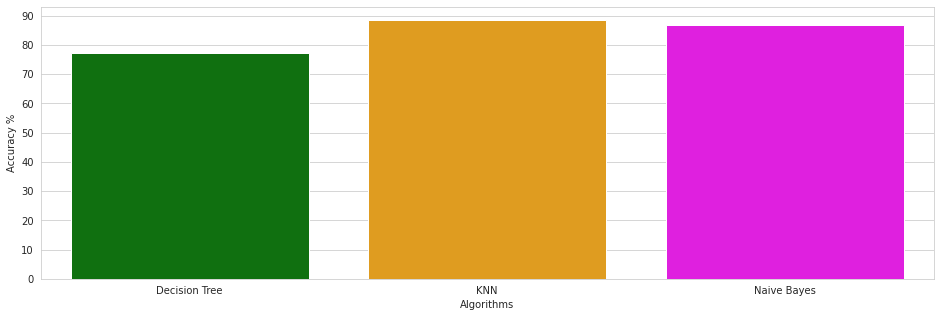

In [31]:
colors = ["green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

### Confusion Matrix

In [32]:
# Predicted values
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test,y_head_knn)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)

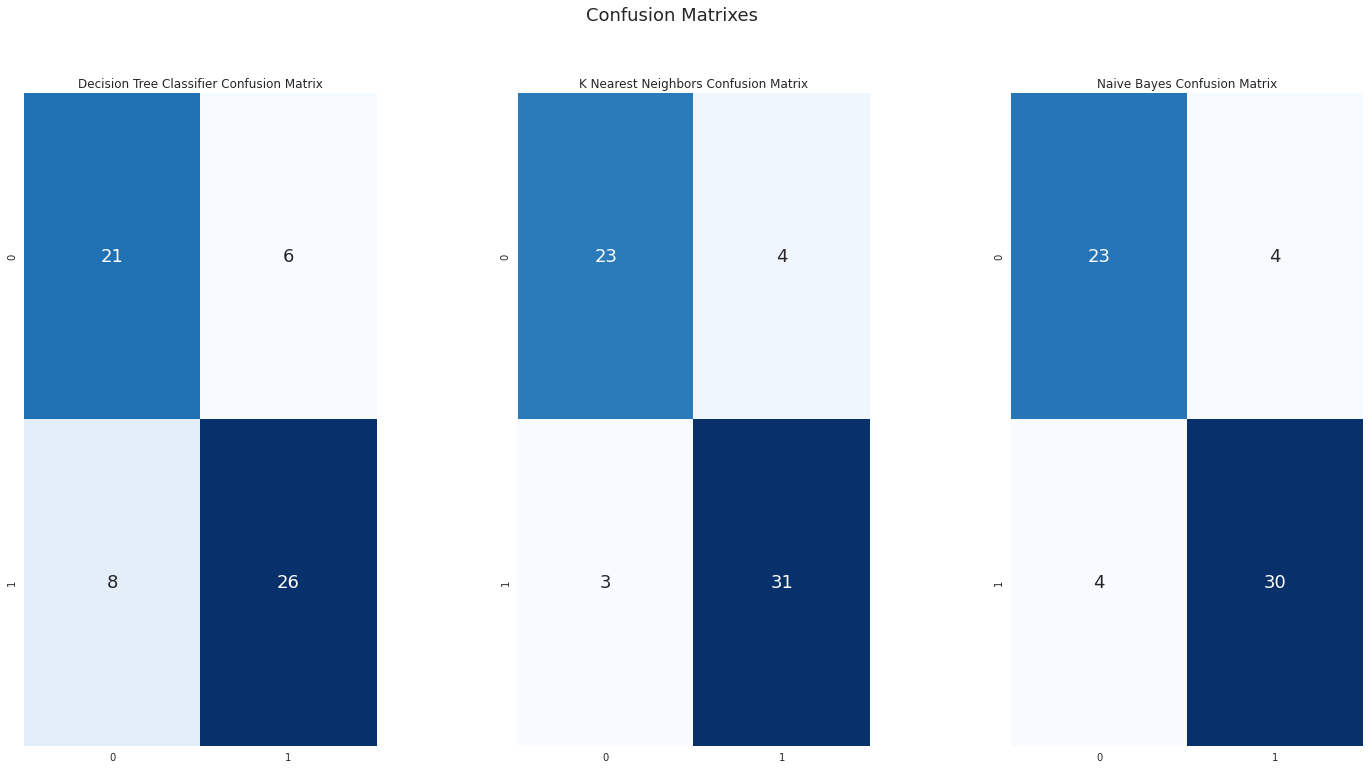

In [34]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=18)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(1,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(1,3,3)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})

plt.show()

## Conclusion

### We achieved maximum performance score with 3-KNN among all others

Thanks and Regards

Any feedback would be appreciated